# Задание

3. Провести кластеризацию (все методы)
4. Для каждого метода подобрать оптимальные гипер-параметры.
5. Самостоятельно реализовать KMeans. Проверить его работу на датасетах.
6. Каждый метод оценивать 2 внешними и 2 внутренними метриками.

# Доп. задание:

Реализовать DB-Scan

In [1]:
from pathlib import Path
import os
import sys

sys.path.append(str(Path(os.getcwd()).parent))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Внешние метрики
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

# Внутренние метрики
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [4]:
def draw(X: np.ndarray, y: np.ndarray) -> None:
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
    plt.show()

In [5]:
def internal_metrics(X: np.ndarray, y_pred: np.ndarray) -> None:
    print(f"""
Внутренние метрики:
    1. Silhouette score = {silhouette_score(X, y_pred)};
    2. Davies-Bouldin score = {davies_bouldin_score(X, y_pred)};
    """)

def external_metrics(y_true: np.ndarray, y_pred: np.ndarray) -> None:
    print(f"""
Внешние метрики:
    1. Rand score = {rand_score(y_true, y_pred)};
    2. Adjusted rand score = {adjusted_rand_score(y_true, y_pred)};
    """)

# 1. Генерация датасетов

In [6]:
from sklearn.datasets import make_classification

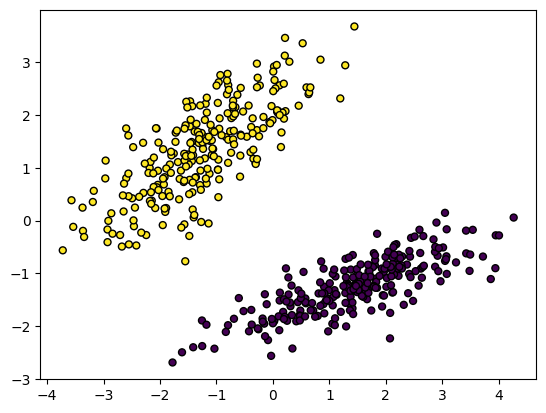

In [71]:
X1, y1 = make_classification(500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=1.3)
draw(X1, y1)

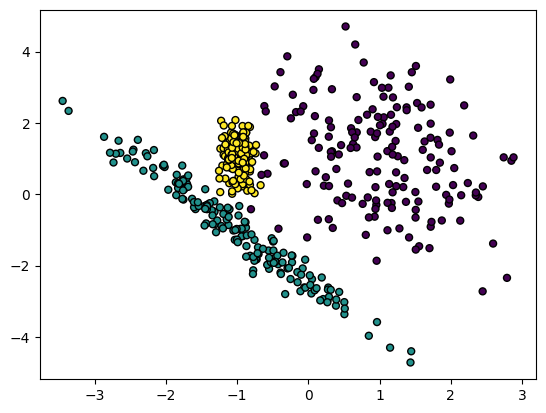

In [78]:
X2, y2 = make_classification(500, n_classes=3, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0)
draw(X2, y2)

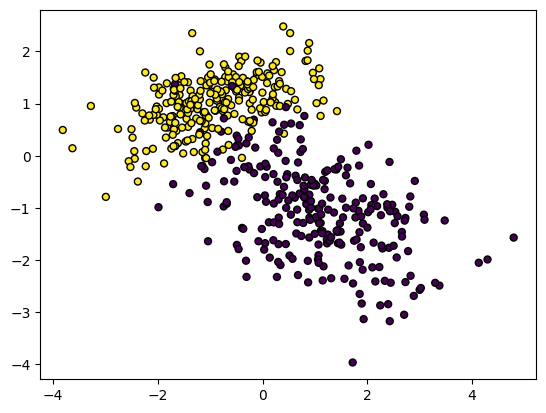

In [80]:
X3, y3 = make_classification(500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0)
draw(X3, y3)

# 2. Кластеризация

In [82]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn_som.som import SOM

## 2.1 KMeans

In [83]:
def GridSearchClusters(estimator: KMeans, X: np.ndarray, min_c: int, max_c: int, verbose=True, **kwargs) -> tuple:
    best_silhouette = 0
    best_est = None
    best_c = None
    ss = []
    for i in range(min_c, max_c):
        est = estimator(i, **kwargs).fit(X)
        silhouette = silhouette_score(X, est.labels_)
        ss.append(silhouette)
        if silhouette >= best_silhouette:
            best_est = est
            best_silhouette = silhouette
            best_c = i

    if verbose:
        plt.plot(range(min_c, max_c), ss)

    return best_est, best_c

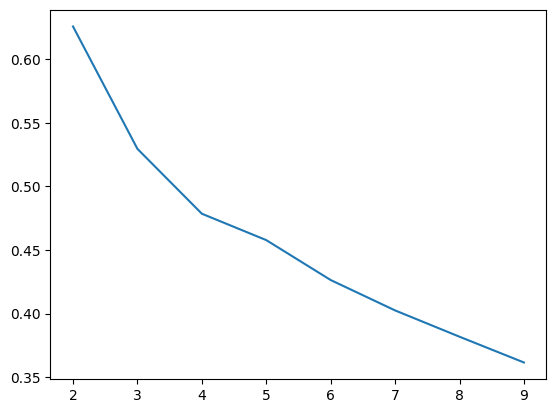

In [84]:
kmeans, c = GridSearchClusters(KMeans, X1, 2, 10, n_init='auto')

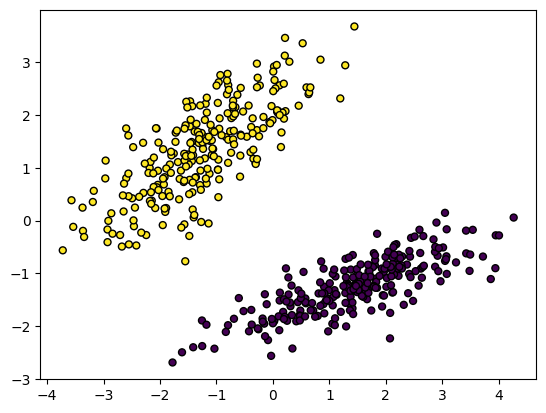

In [85]:
draw(X1, kmeans.labels_)

In [86]:
internal_metrics(X1, kmeans.labels_)
external_metrics(y1, kmeans.labels_)


Внутренние метрики:
    1. Silhouette score = 0.6255767362205096;
    2. Davies-Bouldin score = 0.5703910961489649;
    

Внешние метрики:
    1. Rand score = 1.0;
    2. Adjusted rand score = 1.0;
    


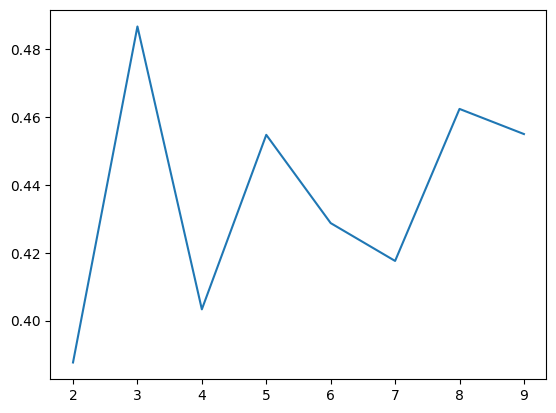

In [87]:
kmeans, c = GridSearchClusters(KMeans, X2, 2, 10, n_init='auto')

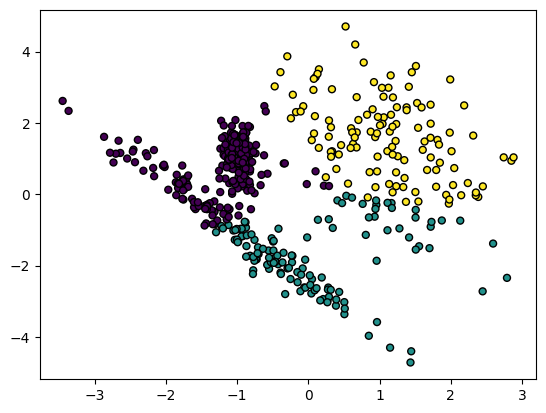

In [88]:
draw(X2, kmeans.labels_)

In [89]:
internal_metrics(X2, kmeans.labels_)
external_metrics(y2, kmeans.labels_)


Внутренние метрики:
    1. Silhouette score = 0.4867245089916263;
    2. Davies-Bouldin score = 0.7481616968414078;
    

Внешние метрики:
    1. Rand score = 0.7499158316633266;
    2. Adjusted rand score = 0.4539317821854687;
    


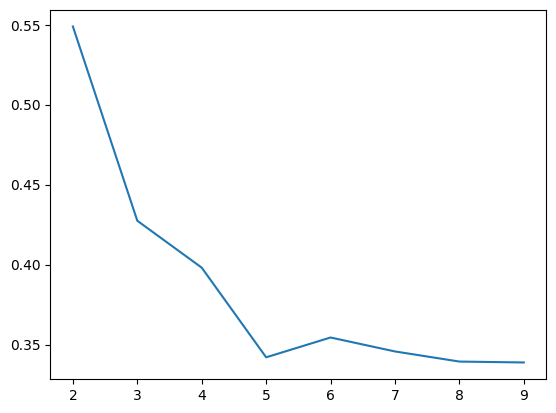

In [90]:
kmeans, c = GridSearchClusters(KMeans, X3, 2, 10, n_init='auto')

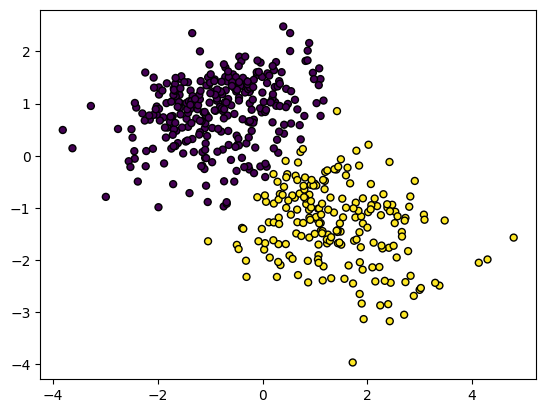

In [91]:
draw(X3, kmeans.labels_)

In [92]:
internal_metrics(X3, kmeans.labels_)
external_metrics(y3, kmeans.labels_)


Внутренние метрики:
    1. Silhouette score = 0.548898993667693;
    2. Davies-Bouldin score = 0.6634087384393555;
    

Внешние метрики:
    1. Rand score = 0.8196392785571143;
    2. Adjusted rand score = 0.6393038086433698;
    


## 2.2 AffinityPropagation

In [93]:
def GridSearchAffinityPropagation(estimator: AffinityPropagation, X: np.ndarray, 
                                  damping: np.ndarray, preference: np.ndarray,
                                  verbose=True, return_params=False, **kwargs) -> tuple:
    
    best_silhouette = 0
    best_est = None
    best_damping = None
    best_preference = None
    ss = []
    names = []

    for d in damping:
        for p in preference:
            est = estimator(damping=d, preference=p, **kwargs).fit(X)
            silhouette = silhouette_score(X, est.labels_)
            ss.append(silhouette)
            names.append(f"{d}/{p}")
            if silhouette >= best_silhouette:
                best_est = est
                best_silhouette = silhouette
                best_damping = d
                best_preference = p

    if verbose:
        f, ax = plt.subplots(figsize=(18, 5))
        ax = plt.bar(names, ss)

    if return_params:
        return best_est, best_damping, best_preference

    return best_est

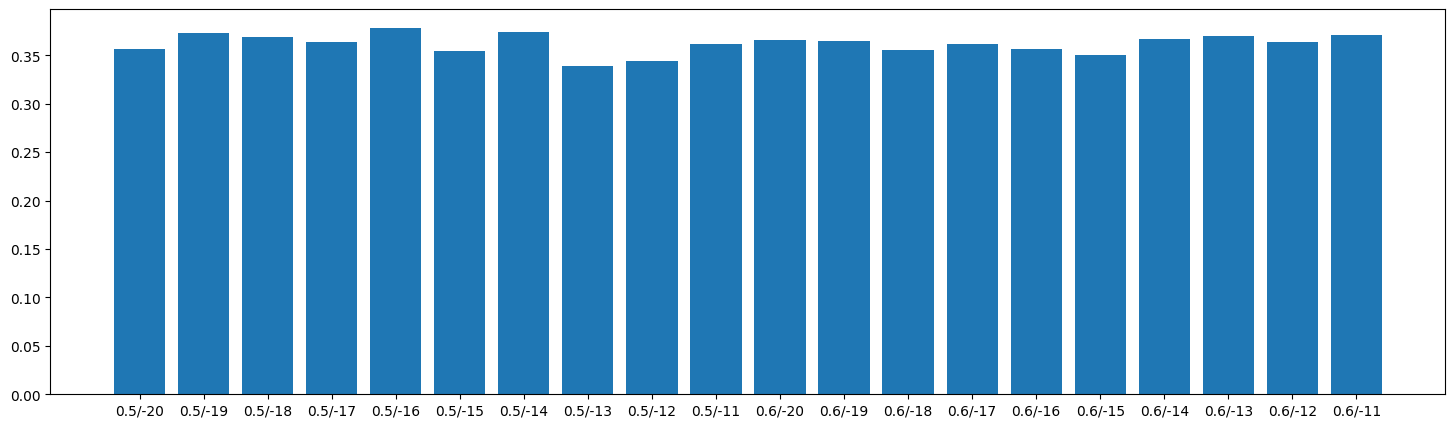

In [94]:
affinityPropagation= GridSearchAffinityPropagation(AffinityPropagation, X1, 
                                                   np.arange(0.5, 0.7, 0.1), np.arange(-20, -10, 1))

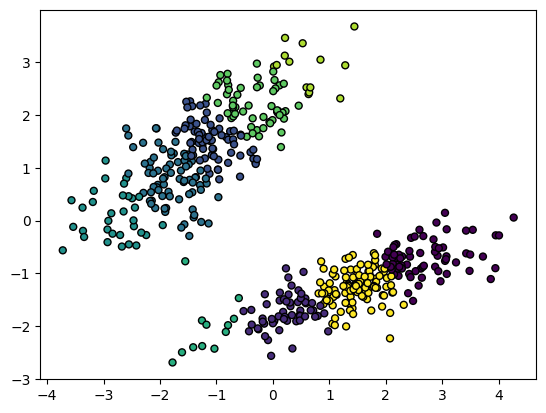

In [95]:
draw(X1, affinityPropagation.labels_)

In [96]:
internal_metrics(X1, affinityPropagation.labels_)
external_metrics(y1, affinityPropagation.labels_)


Внутренние метрики:
    1. Silhouette score = 0.3787102382658358;
    2. Davies-Bouldin score = 0.8289821872469758;
    

Внешние метрики:
    1. Rand score = 0.6428697394789579;
    2. Adjusted rand score = 0.2847132620581349;
    


c:\Users\bugae\ML\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\bugae\ML\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\bugae\ML\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\bugae\ML\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\bugae\ML\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarnin

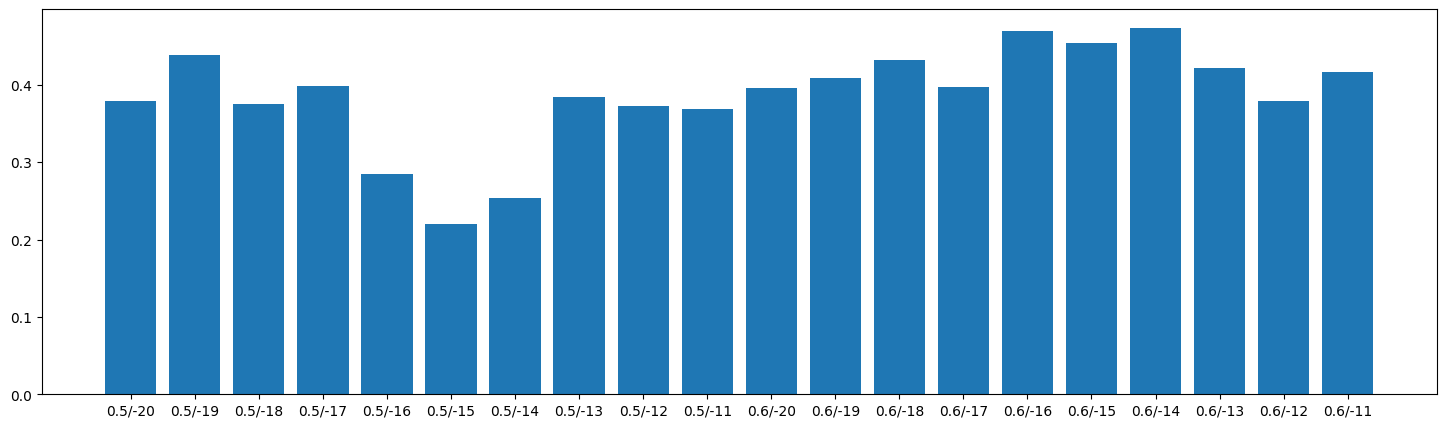

In [97]:
affinityPropagation= GridSearchAffinityPropagation(AffinityPropagation, X2, 
                                                   np.arange(0.5, 0.7, 0.1), np.arange(-20, -10, 1))

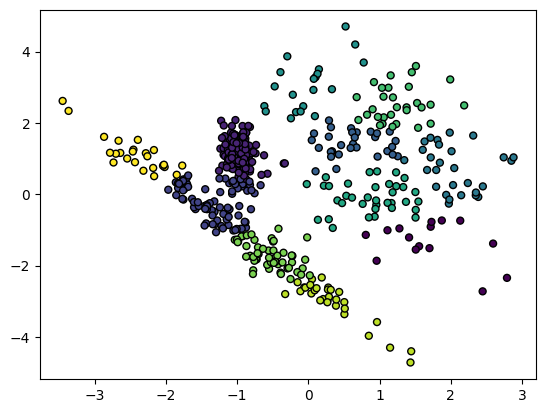

In [98]:
draw(X2, affinityPropagation.labels_)

In [99]:
internal_metrics(X2, affinityPropagation.labels_)
external_metrics(y2, affinityPropagation.labels_)


Внутренние метрики:
    1. Silhouette score = 0.474067982943604;
    2. Davies-Bouldin score = 0.7383781297306641;
    

Внешние метрики:
    1. Rand score = 0.7828617234468938;
    2. Adjusted rand score = 0.4326273459208738;
    


c:\Users\bugae\ML\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\bugae\ML\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\bugae\ML\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\bugae\ML\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


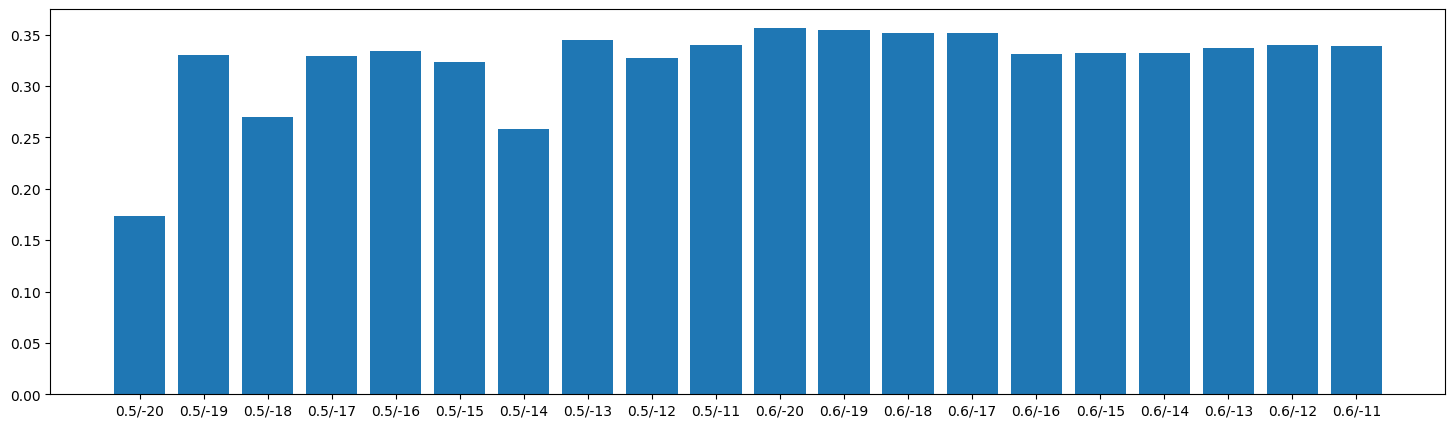

In [100]:
affinityPropagation= GridSearchAffinityPropagation(AffinityPropagation, X3, 
                                                   np.arange(0.5, 0.7, 0.1), np.arange(-20, -10, 1))

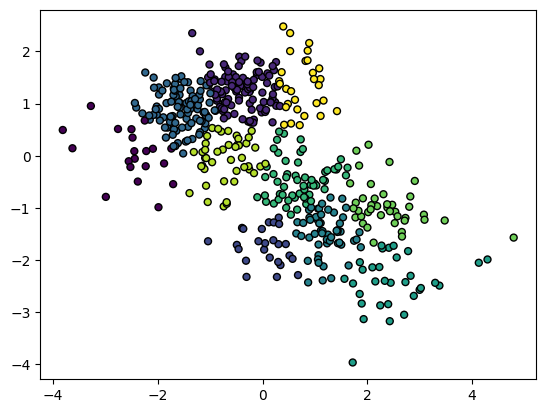

In [101]:
draw(X3, affinityPropagation.labels_)

In [102]:
internal_metrics(X3, affinityPropagation.labels_)
external_metrics(y3, affinityPropagation.labels_)


Внутренние метрики:
    1. Silhouette score = 0.35677817721678096;
    2. Davies-Bouldin score = 0.8358674910637905;
    

Внешние метрики:
    1. Rand score = 0.6088657314629259;
    2. Adjusted rand score = 0.21656186055395313;
    


## 2.3 DBSCAN

In [103]:
from sklearn.neighbors import NearestNeighbors


def GridSearchEps(X: np.ndarray, n_neighbors: int) -> None:
    nbrs = NearestNeighbors(n_neighbors=5).fit(X1)
    distances, indices = nbrs.kneighbors(X1)
    distances = np.sort(np.mean(distances, axis=1))
    plt.plot(distances)

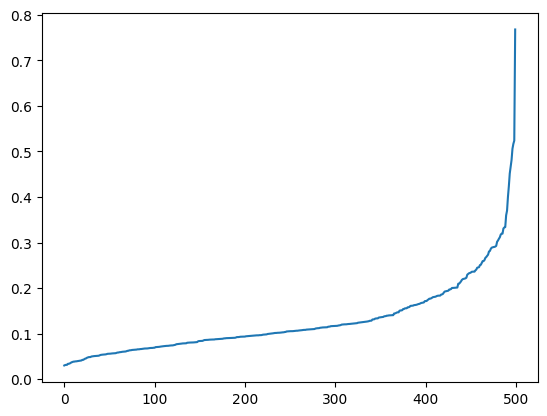

In [104]:
GridSearchEps(X1, 5)

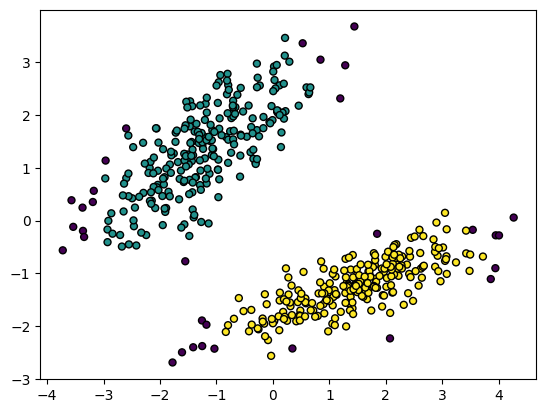

In [105]:
dbscan = DBSCAN(eps=0.35, min_samples=5).fit(X1)
draw(X1, dbscan.labels_)

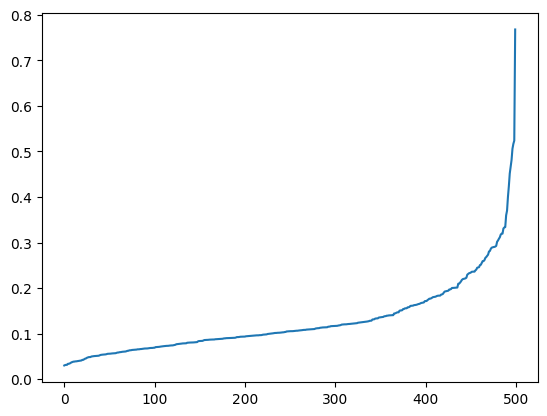

In [106]:
GridSearchEps(X2, 4)

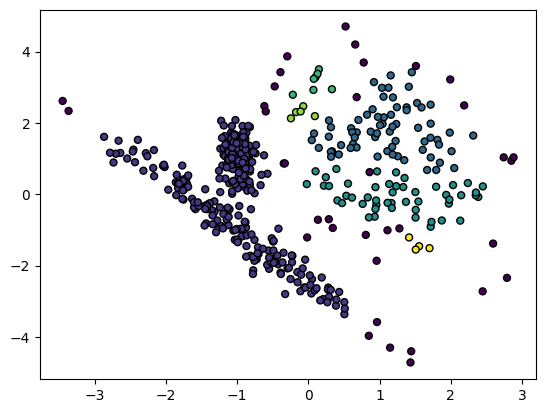

In [107]:
dbscan = DBSCAN(eps=0.35, min_samples=4).fit(X2)
draw(X2, dbscan.labels_)

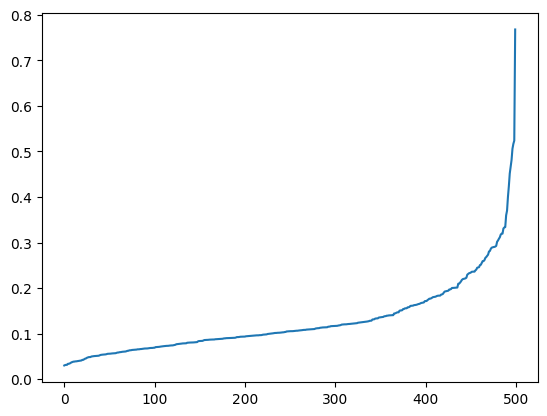

In [108]:
GridSearchEps(X3, 4)

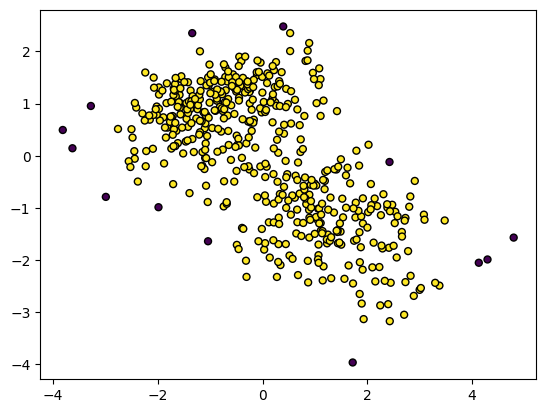

In [109]:
dbscan = DBSCAN(eps=0.4, min_samples=4).fit(X3)
draw(X3, dbscan.labels_)

## 2.4 GaussianMixture

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
gaussianGrid = {
    "n_components": np.arange(2, 5)
}

gaussianMixture = GridSearchCV(GaussianMixture(), gaussianGrid).fit(X1)
labels = gaussianMixture.predict(X1)

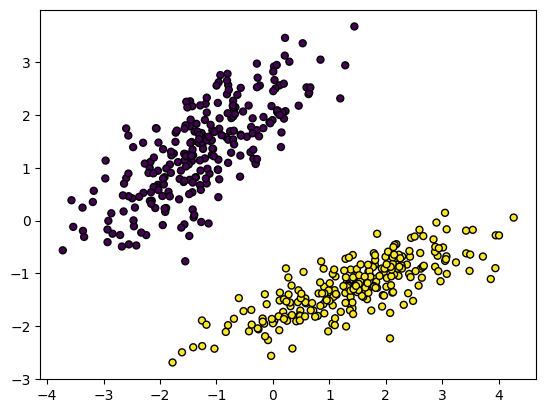

In [112]:
draw(X1, labels)

In [113]:
gaussianMixture = GridSearchCV(GaussianMixture(), gaussianGrid).fit(X2)
labels = gaussianMixture.predict(X2)

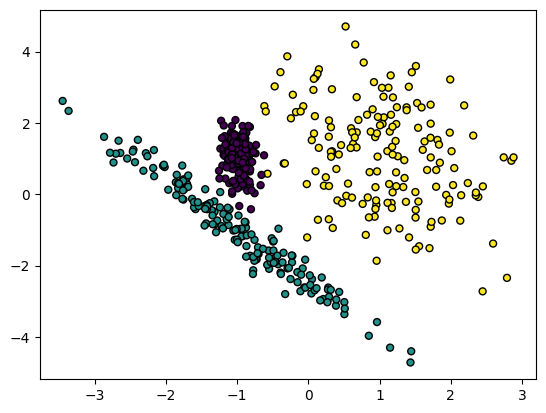

In [114]:
draw(X2, labels)

In [115]:
gaussianMixture = {
    "n_components": np.arange(2, 5)
}

gaussianMixture = GridSearchCV(GaussianMixture(), gaussianGrid).fit(X3)
labels = gaussianMixture.predict(X3)

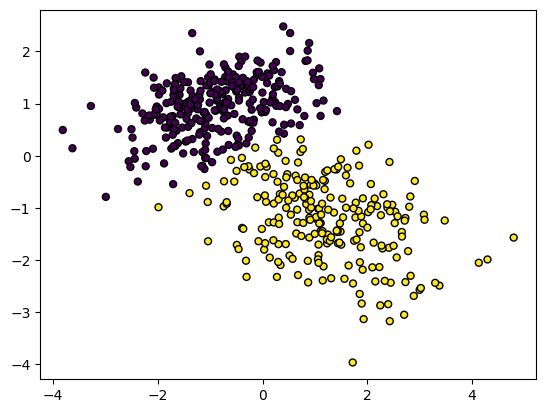

In [116]:
draw(X3, labels)

## 2.5 Hierarchy

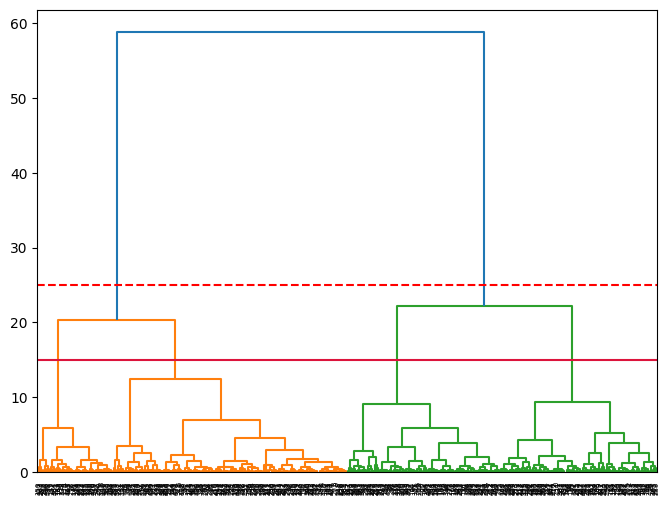

In [117]:
clusters = hierarchy.linkage(X1, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(25, color='red', linestyle='--'); 
plt.axhline(15, color='crimson'); 

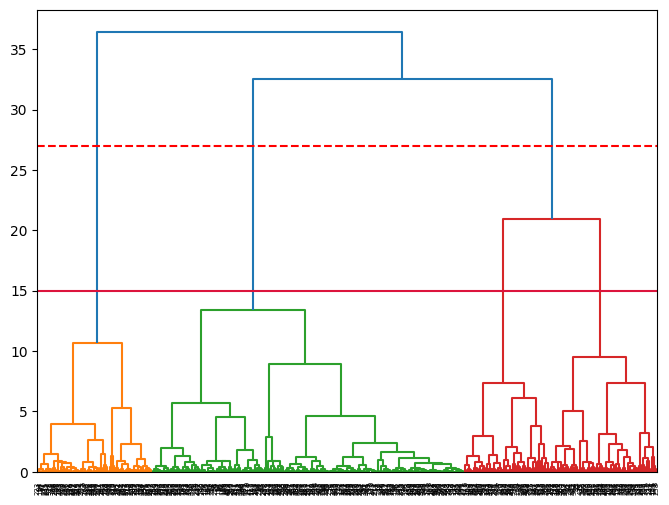

In [118]:
clusters = hierarchy.linkage(X2, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(27, color='red', linestyle='--'); 
plt.axhline(15, color='crimson'); 

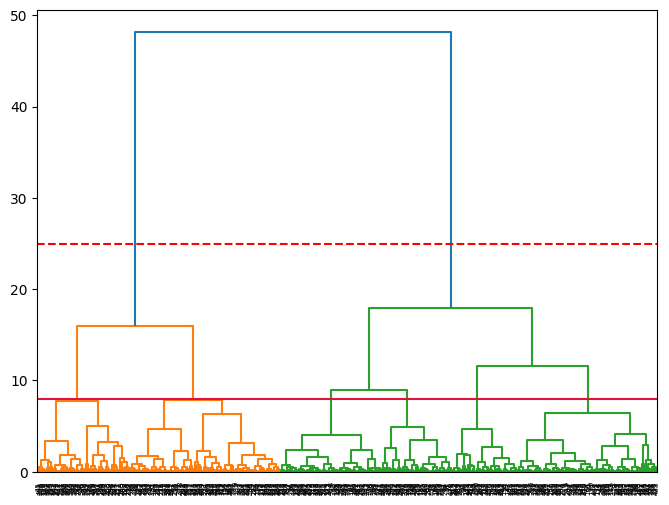

In [119]:
clusters = hierarchy.linkage(X3, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(25, color='red', linestyle='--'); 
plt.axhline(8, color='crimson'); 

## 2.6 AgglomerativeClustering

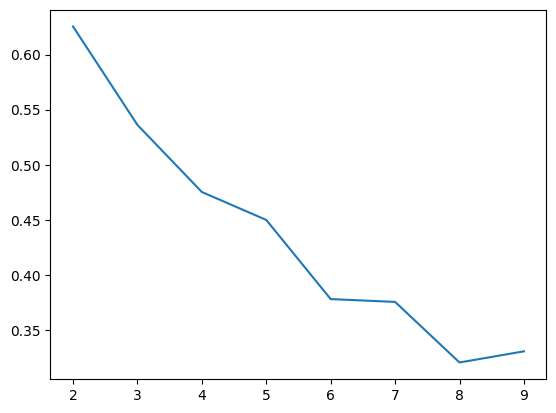

In [120]:
agglomerativeClustering, c = GridSearchClusters(AgglomerativeClustering, X1, 2, 10, linkage="ward")

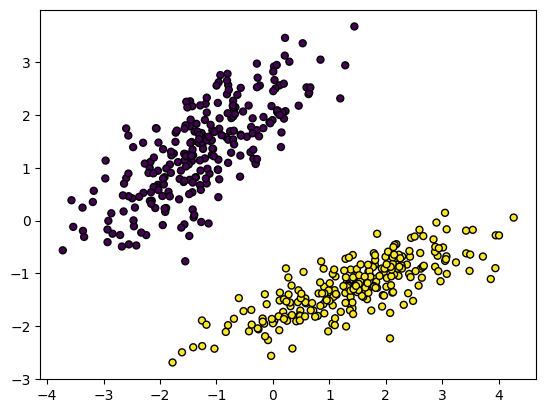

In [121]:
draw(X1, agglomerativeClustering.labels_)

In [122]:
internal_metrics(X1, agglomerativeClustering.labels_)
external_metrics(y1, agglomerativeClustering.labels_)


Внутренние метрики:
    1. Silhouette score = 0.6255767362205096;
    2. Davies-Bouldin score = 0.5703910961489649;
    

Внешние метрики:
    1. Rand score = 1.0;
    2. Adjusted rand score = 1.0;
    


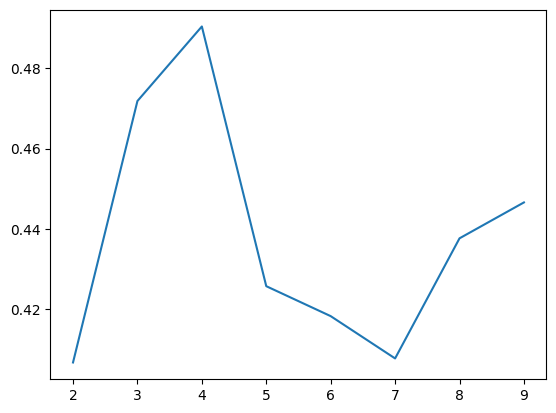

In [123]:
agglomerativeClustering, c = GridSearchClusters(AgglomerativeClustering, X2, 2, 10, linkage="ward")

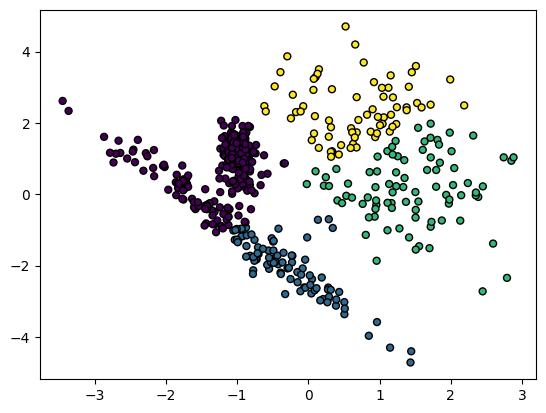

In [124]:
draw(X2, agglomerativeClustering.labels_)

In [125]:
internal_metrics(X2, agglomerativeClustering.labels_)
external_metrics(y2, agglomerativeClustering.labels_)


Внутренние метрики:
    1. Silhouette score = 0.49038861403272893;
    2. Davies-Bouldin score = 0.7440460180994838;
    

Внешние метрики:
    1. Rand score = 0.7615871743486974;
    2. Adjusted rand score = 0.46348873243359434;
    


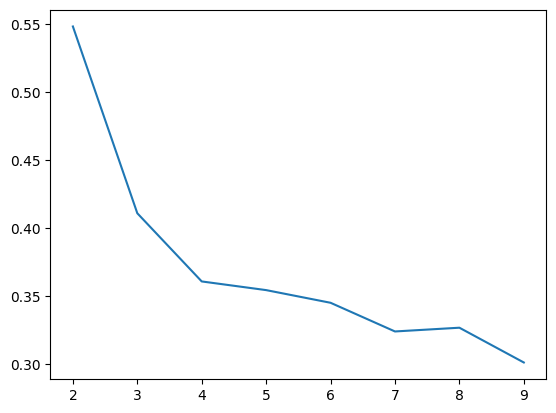

In [126]:
agglomerativeClustering, c = GridSearchClusters(AgglomerativeClustering, X3, 2, 10, linkage="ward")

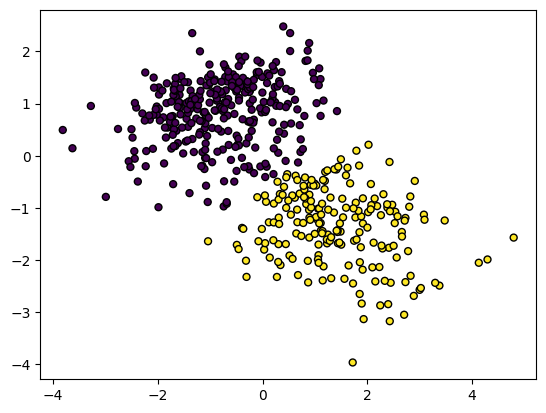

In [127]:
draw(X3, agglomerativeClustering.labels_)

In [128]:
internal_metrics(X3, agglomerativeClustering.labels_)
external_metrics(y3, agglomerativeClustering.labels_)


Внутренние метрики:
    1. Silhouette score = 0.5483774561010655;
    2. Davies-Bouldin score = 0.6615777377578169;
    

Внешние метрики:
    1. Rand score = 0.8069418837675351;
    2. Adjusted rand score = 0.6139183875978077;
    


## 2.7 SOM

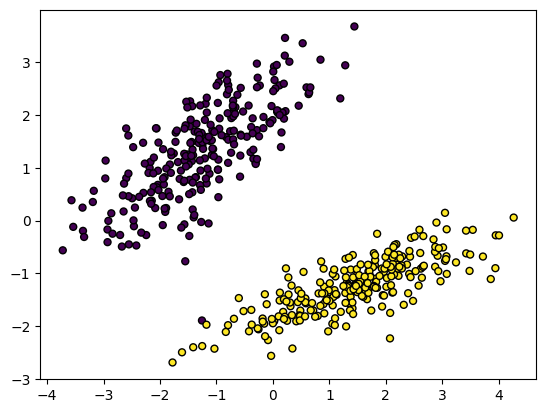

In [129]:
som = SOM(2, 1, 2)
som.fit(X1)
labels = som.predict(X1)
draw(X1, labels)

In [130]:
internal_metrics(X1, labels)
external_metrics(y1, labels)


Внутренние метрики:
    1. Silhouette score = 0.6245536024900166;
    2. Davies-Bouldin score = 0.5710410554071782;
    

Внешние метрики:
    1. Rand score = 0.996;
    2. Adjusted rand score = 0.9919999681285151;
    


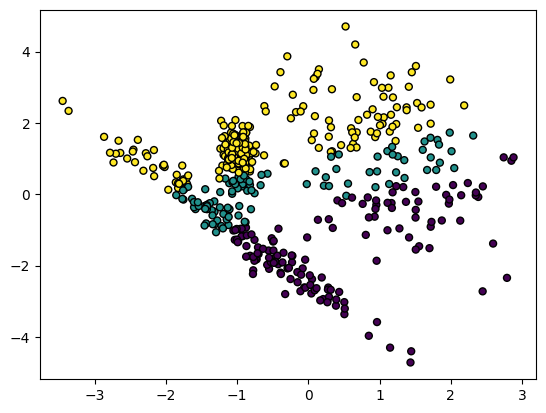

In [142]:
som = SOM(1, 3, 2)
som.fit(X2)
labels = som.predict(X2)
draw(X2, labels)

In [132]:
internal_metrics(X2, labels)
external_metrics(y2, labels)


Внутренние метрики:
    1. Silhouette score = 0.41105198599950654;
    2. Davies-Bouldin score = 1.0294159672285352;
    

Внешние метрики:
    1. Rand score = 0.6120801603206413;
    2. Adjusted rand score = 0.2347909785377789;
    


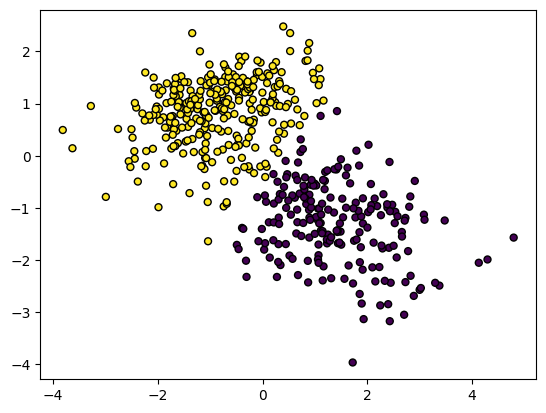

In [133]:
som = SOM(2, 1, 2)
som.fit(X3)
labels = som.predict(X3)
draw(X3, labels)

In [134]:
internal_metrics(X3, labels)
external_metrics(y3, labels)


Внутренние метрики:
    1. Silhouette score = 0.5475916541254482;
    2. Davies-Bouldin score = 0.6645901639663666;
    

Внешние метрики:
    1. Rand score = 0.816440881763527;
    2. Adjusted rand score = 0.632906342486408;
    


# 3. Собственная реализация KMeans

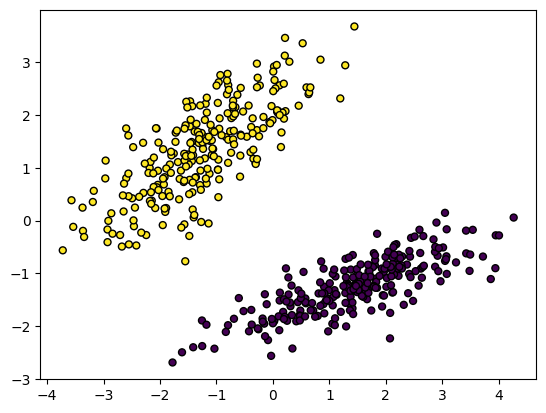

In [135]:
from mylib.clusterization.KMeans import KMeans


km = KMeans(2, 0.1).fit(X1)
draw(X1, km.labels_)

In [136]:
internal_metrics(X1, km.labels_)
external_metrics(y1, km.labels_)


Внутренние метрики:
    1. Silhouette score = 0.6255767362205096;
    2. Davies-Bouldin score = 0.5703910961489649;
    

Внешние метрики:
    1. Rand score = 1.0;
    2. Adjusted rand score = 1.0;
    
